In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Advertising.csv')
df.head()df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = pd.read_csv('Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


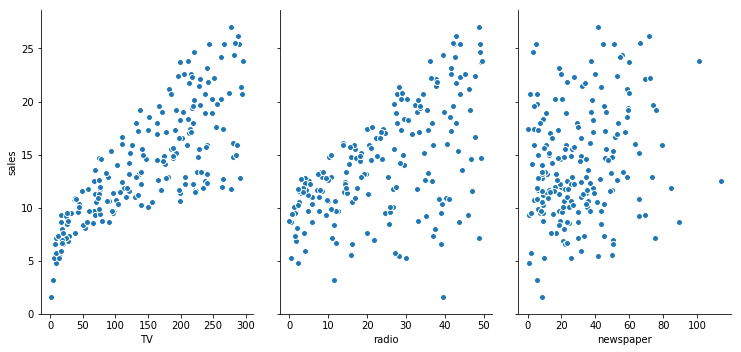

In [4]:
import seaborn as sb
%matplotlib inline

sb.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars=['sales'], kind='scatter', size=5, aspect=0.7)

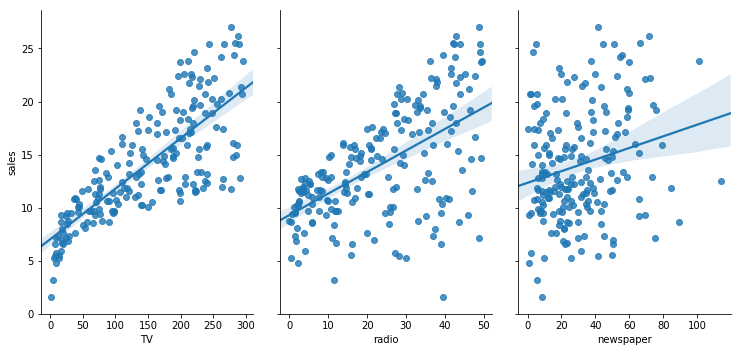

In [5]:
sb.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars=['sales'], kind='reg', size=5, aspect=0.7)

In [6]:
X = df[['TV', 'radio', 'newspaper']]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [7]:
y = df['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [12]:
y_pred = linreg.predict(X_test)

In [13]:
#Mean absolute error example
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
print((10 + 0 + 20 + 10)/4.)

10.0


In [14]:
#mean squared error example
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

150.0


In [15]:
#root mean square error example
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

12.2474487139


In [16]:
#applying MAE, MSE, RMSE to our data
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.06689170826
1.97304562023
1.40465142303


In [17]:
#feature selection
#newspaper doesn't fully help in our prediction
#we remove newspaper and predict the RMSE  for others
X = df[['TV', 'radio']]
y = df['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


In [18]:
#lower the RMSE. less the error